In [4]:
import numpy as np
import math
from Grid import Grid 
from MesData import MesData
from ParaviewFile import ParaviewFile

data_4_4 = MesData('Test1_4_4.txt').data
data_31_31 = MesData('Test3_31_31_kwadrat.txt').data
data_mix = MesData('Test2_4_4_MixGrid.txt').data
data_trap = MesData('Test4_31_31_trapez.txt').data 
# gr = Grid(data_4_4)
# gr_31_31 = Grid(data_31_31)
gr_mix = Grid(data_mix, 3)
# gr_trapez = Grid(data_trap)

[0.100000001, 0.0546918176, 0.0623899326, 0.100000001] [0.00499999989, 0.00499999989, -0.0326100662, -0.0403081849] [[[-1.0, -0.7745966692414834, 0.5555555555555555], [-1.0, 0.0, 0.8888888888888892], [-1.0, 0.7745966692414834, 0.5555555555555555]], [[-0.7745966692414834, -1.0, 0.5555555555555555], [0.0, -1.0, 0.8888888888888892], [0.7745966692414834, -1.0, 0.5555555555555555]]] 300.0 [0, -1]
[0.0546918176, 0.0226540919, 0.0303522106, 0.0623899326] [0.00499999989, 0.00499999989, -0.0253522098, -0.0326100662] [[[-0.7745966692414834, -1.0, 0.5555555555555555], [0.0, -1.0, 0.8888888888888892], [0.7745966692414834, -1.0, 0.5555555555555555]]] 300.0 [0]
[0.0226540919, 0.0, 0.0, 0.0303522106] [0.00499999989, 0.00499999989, -0.0176540911, -0.0253522098] [[[1.0, -0.7745966692414834, 0.5555555555555555], [1.0, 0.0, 0.8888888888888892], [1.0, 0.7745966692414834, 0.5555555555555555]], [[-0.7745966692414834, -1.0, 0.5555555555555555], [0.0, -1.0, 0.8888888888888892], [0.7745966692414834, -1.0, 0.55

In [5]:
gr_mix.grid[0][0].surface

{'dNdx': [[20.363488601712767,
   -19.92402714667818,
   -2.5865021817329623,
   2.147040726698376],
  [13.938970072290163,
   -11.84609903285496,
   -12.317839135991695,
   10.224968096556495],
  [6.495868393941227,
   -2.4874459250424885,
   -23.592042811349756,
   19.583620342451017],
  [20.238066035545778,
   -19.7663259168182,
   -2.7764820607618956,
   2.304741942034317],
  [13.294313046892176,
   -11.03553352737979,
   -13.294313046892176,
   11.03553352737979],
  [5.154867971965504,
   -0.8013265746637076,
   -25.623280934842516,
   21.26973953754072],
  [20.092758184838736,
   -19.58362173953083,
   -2.9965825478027974,
   2.4874461024948915],
  [12.538648086508166,
   -10.085391162600011,
   -14.43893272856103,
   11.985675804652875],
  [3.5611969080381805,
   1.2024905569279543,
   -28.037243949549946,
   23.273556484583814]],
 'dNdy': [[20.363487976985706,
   2.1470408585690333,
   -2.586502102382222,
   -19.924026733172518],
  [20.2380654752466,
   2.3047420074200202,
   -

In [10]:
ParaviewFile(gr.data, gr.TempinTime).to_file('paraview_data/')
# ParaviewFile(gr_31_31.data, gr_31_31.TempinTime).to_file('paraview_data_31_31/')
ParaviewFile(gr_mix.data, gr_mix.TempinTime).to_file('paraview_data_mix/')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


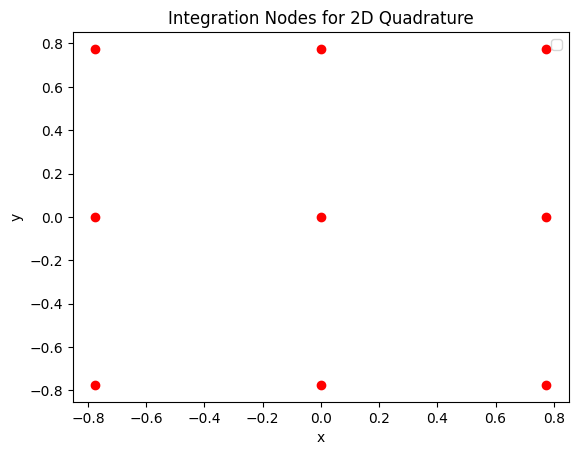

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quadrature

# Определите количество узлов для квадратуры
num_nodes = 3

# Получите узлы и веса интегрирования
nodes_x, weights_x = np.polynomial.legendre.leggauss(num_nodes)
nodes_y, weights_y = np.polynomial.legendre.leggauss(num_nodes)

# Создайте комбинацию узлов и весов для двумерной квадратуры
nodes_combinations = np.array(np.meshgrid(nodes_x, nodes_y)).T.reshape(-1, 2)
weights_combinations = np.outer(weights_x, weights_y).reshape(-1)

# Определите функцию, которую вы интегрируете
def integrand(x, y):
    return x**2 + y**2

# Задайте пределы интегрирования
x_lower, x_upper = -1, 1
y_lower, y_upper = -1, 1

# Создайте сетку для отображения интегрируемой функции
x_vals = np.linspace(x_lower, x_upper, 100)
y_vals = np.linspace(y_lower, y_upper, 100)
# X, Y = np.meshgrid(x_vals, y_vals)
# Z = integrand(X, Y)

# Постройте график функции и узлов интегрирования
# plt.contourf(X, Y, Z, cmap="viridis")
plt.scatter(nodes_combinations[:, 0], nodes_combinations[:, 1], color='red', marker='o')
plt.title('Integration Nodes for 2D Quadrature')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [10]:
from sympy import N
from Calkowanie import Calkowanie
from itertools import chain

Dot_ranged = []
calkowanie = Calkowanie()
def test_Hbc(n_range, alfa, length):
    dot_nranges = [ np.dot( n_range[i].reshape(4,1), n_range[i].reshape(1,4) ) for i in range( len( n_range))]
    Dot_ranged.append(dot_nranges)
    return alfa * sum(dot_nranges) * length

def L(x, y):
    # x = np.array(x)
    # y = np.array(y)
    # distances = np.sqrt((np.diff(x)**2) + (np.diff(y)**2))
    # return distances
    lengths = []
    for first in range(4):
        last = first+1 if first < 3 else 0
        lengths.append( math.sqrt( ( ( x[first] - x[last] )**2 + ( y[first] - y[last] )**2 ) ) )
    return lengths

def Hbc_calulation(x, y, pc, alfa, L_ind):
    lengths = L(x, y)
    
    # lengths = [lengths[3], lengths[0], lengths[1], lengths[2]]
    # lengths = [lengths[0], lengths[-1], lengths[-2], lengths[-3]]
    Hbc = []
    print(lengths)
    for i in range(len(pc)):
        Pcs = pc[i]
        print(Pcs)
        N_range = [ calkowanie.N_range(pc) for pc in Pcs]
        Hbc.append(test_Hbc( N_range, alfa, lengths[L_ind[i]]/2 ) )
    return Hbc

nr = 0
nr_2 = 1
Pc_1 = Grid.PC
# Pc_1 = [Grid.PC[1], Grid.PC[-2]]
# Pc_1 = gr_mix.grid[nr][nr_2].pc
x, y = gr_mix.grid[nr][nr_2].x, gr_mix.grid[nr][nr_2].y
L_ind = [2,3, 2,3]

alfa = data_mix['Alfa']

sum(Hbc_calulation(x,y, Pc_1, alfa, L_ind))

[0.0320377257, 0.03131321868772068, 0.03284953744685464, 0.038389816955117055]
[[1, -0.5773502691896258], [1, 0.5773502691896258]]
[[-0.5773502691896258, 1], [0.5773502691896258, 1]]
[[-1, 0.5773502691896258], [-1, -0.5773502691896258]]
[[-0.5773502691896258, -1], [0.5773502691896258, -1]]


array([[7.12393544, 1.91949085, 0.        , 1.64247687],
       [1.91949085, 7.12393544, 1.64247687, 0.        ],
       [0.        , 1.64247687, 7.12393544, 1.91949085],
       [1.64247687, 0.        , 1.91949085, 7.12393544]])

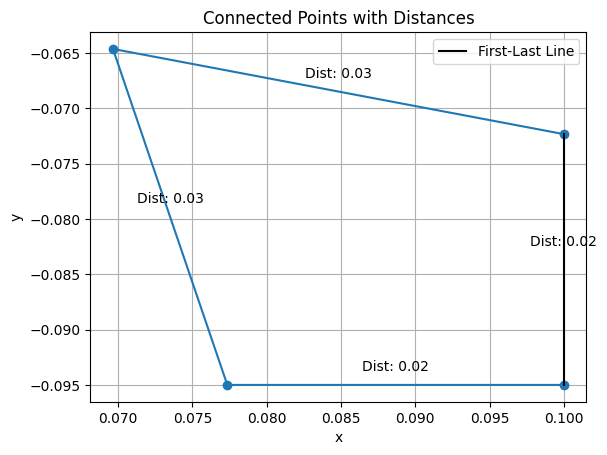

In [7]:
import numpy as np
import matplotlib.pyplot as plt
Dist = []
def calculate_distances_and_plot(x, y):
    # Проверка, что массивы x и y имеют одинаковую длину
    if len(x) != len(y):
        raise ValueError("Массивы x и y должны иметь одинаковую длину")

    # Используем numpy для эффективных вычислений
    x = np.array(x)
    y = np.array(y)

    # Вычисляем расстояния между точками
    distances = np.sqrt((np.diff(x)**2) + (np.diff(y)**2))
    Dist.append(distances)
    # Строим график линиями, соединяющими точки
    plt.plot(x, y, marker='o', linestyle='-')

    # Подписываем линии с расстояниями (кроме последней линии)
    for i in range(len(x) - 1):
        plt.annotate(f"Dist: {distances[i]:.2f}",
                     ((x[i] + x[i + 1]) / 2, (y[i] + y[i + 1]) / 2),
                     textcoords="offset points", xytext=(0, 10), ha='center')

    # Соединяем первую и последнюю точку
    plt.plot([x[0], x[-1]], [y[0], y[-1]], linestyle='-', color='black', label='First-Last Line')

    # Вычисляем и подписываем расстояние между первой и последней точками
    distance_first_last = np.sqrt((x[-1] - x[0])**2 + (y[-1] - y[0])**2)
    Dist.append(distance_first_last)
    plt.annotate(f"Dist: {distance_first_last:.2f}",
                 ((x[0] + x[-1]) / 2, (y[0] + y[-1]) / 2),
                 textcoords="offset points", xytext=(0, 10), ha='center')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Connected Points with Distances')
    plt.grid(True)
    plt.legend()
    plt.show()

# Пример использования
row = 2
col = 0
x, y = gr_mix.grid[row][col].x, gr_mix.grid[row][col].y


calculate_distances_and_plot(x, y)


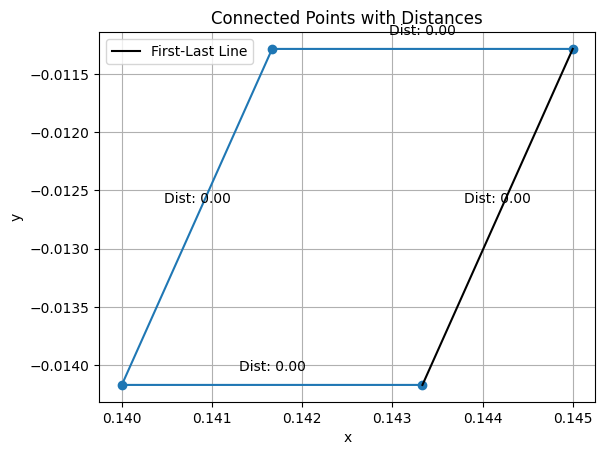

In [12]:
x, y = gr_trapez.grid[1][1].x, gr_trapez.grid[1][1].y

calculate_distances_and_plot(x, y)

In [145]:
gr_mix.grid[1][0].x, gr_mix.grid[1][0].y

([0.100000001, 0.0546918176, 0.0623899326, 0.100000001],
 [0.00499999989, 0.00499999989, -0.0326100662, -0.0403081849])

In [11]:
L(gr_trapez.grid[1][0].x, gr_trapez.grid[1][0].y)

[0.0033333299999999955,
 0.003333332806618301,
 0.0033333299999999955,
 0.003333332806618301]

# TEST

In [2]:
from Calkowanie import Calkowanie

calkowanie = Calkowanie()

In [2]:
calkowanie.matrix9_4()
Calkowanie.print_matrix(calkowanie.dNdEta9_4)

-0.44364916731037085, -0.05635083268962915, 0.05635083268962915, 0.44364916731037085
-0.44364916731037085, -0.05635083268962915, 0.05635083268962915, 0.44364916731037085
-0.44364916731037085, -0.05635083268962915, 0.05635083268962915, 0.44364916731037085
-0.25, -0.25, 0.25, 0.25
-0.25, -0.25, 0.25, 0.25
-0.25, -0.25, 0.25, 0.25
-0.05635083268962915, -0.44364916731037085, 0.44364916731037085, 0.05635083268962915
-0.05635083268962915, -0.44364916731037085, 0.44364916731037085, 0.05635083268962915
-0.05635083268962915, -0.44364916731037085, 0.44364916731037085, 0.05635083268962915


In [2]:
import numpy as np
from numpy.polynomial.legendre import leggauss

num_integration_points = 3
gauss_nodes, gauss_weights = leggauss(num_integration_points)

def compute_dN_dxi_deta(xi, eta):
    dN_dxi = np.array([-0.25 * (1 - eta), 0.25 * (1 - eta), 0.25 * (1 + eta), -0.25 * (1 + eta)])
    dN_deta = np.array([-0.25 * (1 - xi), -0.25 * (1 + xi), 0.25 * (1 + xi), 0.25 * (1 - xi)])
    return dN_dxi, dN_deta

Xi = []
Eta = []
for xi, weight_xi in zip(gauss_nodes, gauss_weights):
    for eta, weight_eta in zip(gauss_nodes, gauss_weights):
        dN_dxi, dN_deta = compute_dN_dxi_deta(xi, eta)
        Xi.append(dN_dxi)
        Eta.append(dN_deta)

In [4]:
import numpy as np

def jacobian_matrix(xi, eta, x_nodes, y_nodes):
    # Производные базисных функций по параметрическим координатам
    dN_dxi = np.array([-0.25 * (1 - eta), 0.25 * (1 - eta), 0.25 * (1 + eta), -0.25 * (1 + eta)])
    dN_deta = np.array([-0.25 * (1 - xi), -0.25 * (1 + xi), 0.25 * (1 + xi), 0.25 * (1 - xi)])

    # Вычисление матрицы Якобиана
    dx_dxi = np.dot(x_nodes, dN_dxi)
    dx_deta = np.dot(x_nodes, dN_deta)
    dy_dxi = np.dot(y_nodes, dN_dxi)
    dy_deta = np.dot(y_nodes, dN_deta)

    J = np.array([
        [dx_dxi, dx_deta],
        [dy_dxi, dy_deta]
    ])

    return J

# Пример использования
x_nodes = np.array([0.0, 1.0, 1.0, 0.0])
y_nodes = np.array([0.0, 0.0, 1.0, 1.0])
xi = 0.1
eta = 0.2

Jacobian = jacobian_matrix(xi, eta, x_nodes, y_nodes)
print("Матрица Якобиана:")
print(Jacobian)


Матрица Якобиана:
[[0.5 0. ]
 [0.  0.5]]


In [3]:
from second.Calkowanie import Calkowanie as Calkowanie2
from Calkowanie import Calkowanie as Calkowanie1

from second.Calculation import Calculation
from Calculation import Calculation as Calculation1


calkowanie = Calkowanie2(2)
calkowanie_2 = Calkowanie1() 
x , y = calkowanie.default_x_y['x'], calkowanie.default_x_y['y']

calculation = Calculation(3)
calculation_1 = Calculation1()

In [62]:
gr_mix.grid[0][0].surface['Hbc']

array([[9.06163682, 2.26540924, 0.        , 2.26540917],
       [2.26540924, 4.53081848, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [2.26540917, 0.        , 0.        , 4.53081834]])

In [14]:
gr_mix.grid[0][0].surface['P']

array([[16310.9462742],
       [ 8155.4732622],
       [    0.       ],
       [ 8155.473012 ]])

In [7]:
from second.Grid import Grid as Grid2

gr_mix_4 = Grid2(data_mix, 4)
gr_mix_3 = Grid2(data_mix, 3)
gr_mix_2 = Grid2(data_mix, 2)
# gr_mix_2.grid[0][0].surface

[0.100000001, 0.0546918176, 0.0623899326, 0.100000001] [0.00499999989, 0.00499999989, -0.0326100662, -0.0403081849] [[[-1.0, -0.8611363115940526, 0.34785484513745357], [-1.0, -0.33998104358485626, 0.6521451548625466], [-1.0, 0.33998104358485626, 0.6521451548625466], [-1.0, 0.8611363115940526, 0.34785484513745357]], [[-0.8611363115940526, -1.0, 0.34785484513745357], [-0.33998104358485626, -1.0, 0.6521451548625466], [0.33998104358485626, -1.0, 0.6521451548625466], [0.8611363115940526, -1.0, 0.34785484513745357]]] 300.0 [0, -1]
[0.0546918176, 0.0226540919, 0.0303522106, 0.0623899326] [0.00499999989, 0.00499999989, -0.0253522098, -0.0326100662] [[[-0.8611363115940526, -1.0, 0.34785484513745357], [-0.33998104358485626, -1.0, 0.6521451548625466], [0.33998104358485626, -1.0, 0.6521451548625466], [0.8611363115940526, -1.0, 0.34785484513745357]]] 300.0 [0]
[0.0226540919, 0.0, 0.0, 0.0303522106] [0.00499999989, 0.00499999989, -0.0176540911, -0.0253522098] [[[1.0, -0.8611363115940526, 0.347854845

In [10]:
gr_mix_3.grid[0][0].surface['Hbc']

array([[9.06163682, 2.26540924, 0.        , 2.26540917],
       [2.26540924, 4.53081848, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [2.26540917, 0.        , 0.        , 4.53081834]])

In [11]:
gr_mix_4.grid[0][0].surface['Hbc']

array([[9.06163682, 2.26540924, 0.        , 2.26540917],
       [2.26540924, 4.53081848, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [2.26540917, 0.        , 0.        , 4.53081834]])

In [12]:
gr_mix_2.grid[0][0].surface['Hbc']

array([[9.06163682, 2.26540924, 0.        , 2.26540917],
       [2.26540924, 4.53081848, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [2.26540917, 0.        , 0.        , 4.53081834]])

In [13]:
gr_mix.grid[0][0].surface['Hbc']

array([[9.06163682, 2.26540924, 0.        , 2.26540917],
       [2.26540924, 4.53081848, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [2.26540917, 0.        , 0.        , 4.53081834]])

In [41]:
gr_mix_3.grid[0][0].surface['Hbc']

array([[14.27207799,  3.05830247,  0.        ,  3.05830238],
       [ 3.05830247,  7.1360391 ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 3.05830238,  0.        ,  0.        ,  7.13603889]])

In [44]:
gr_mix_3.grid[0][0].pc

[[[-1.0, -0.7745966692414834, 0.5555555555555555],
  [-1.0, 0.0, 0.8888888888888892],
  [-1.0, 0.7745966692414834, 0.5555555555555555]],
 [[-0.7745966692414834, -1.0, 0.5555555555555555],
  [0.0, -1.0, 0.8888888888888892],
  [0.7745966692414834, -1.0, 0.5555555555555555]]]

In [48]:
calculation.Hbc_calulation(gr_mix_3.grid[0][0].x, gr_mix_3.grid[0][0].y, gr_mix_3.grid[0][0].pc, gr_mix_3.data['Alfa'], gr_mix_3.grid[0][0].L_ind)

array([[9.06163682, 2.26540924, 0.        , 2.26540917],
       [2.26540924, 4.53081848, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [2.26540917, 0.        , 0.        , 4.53081834]])

In [6]:
Grid2(data_mix, 2)

AttributeError: 'Grid' object has no attribute 'calkowanie'